## PCA, Attribute Reduction and Multicollinearity

Multicollinearity occurs when variables (features) are highly correlated with each other. This affects the performance of regression and classification models.

PCA (Principal Component Analysis) takes advantage of multicollinearity, as it combines highly correlated variables into a set of uncorrelated variables.

In this, we are going to build a logistic regression model for the breast_cancer base. First, let's tackle the problem without applying PCA and then compare the result with applying PCA.

based on post [Medium Blog Post](https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b#:~:text=PCA%20in%20action%20to%20remove%20multicollinearity&text=Multicollinearity%20occurs%20when%20features%20input,of%20regression%20and%20classification%20models).

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 30)

The base has 30 variables and 569 observations. The PCA will help us with multicollinearity, if any. Anyway, when we apply the PCA we will reduce the number of variables, that is, we will make a dimensionality reduction.

### Heatmap

First, let's create a heatmap to visualize the correlation between the base variables.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

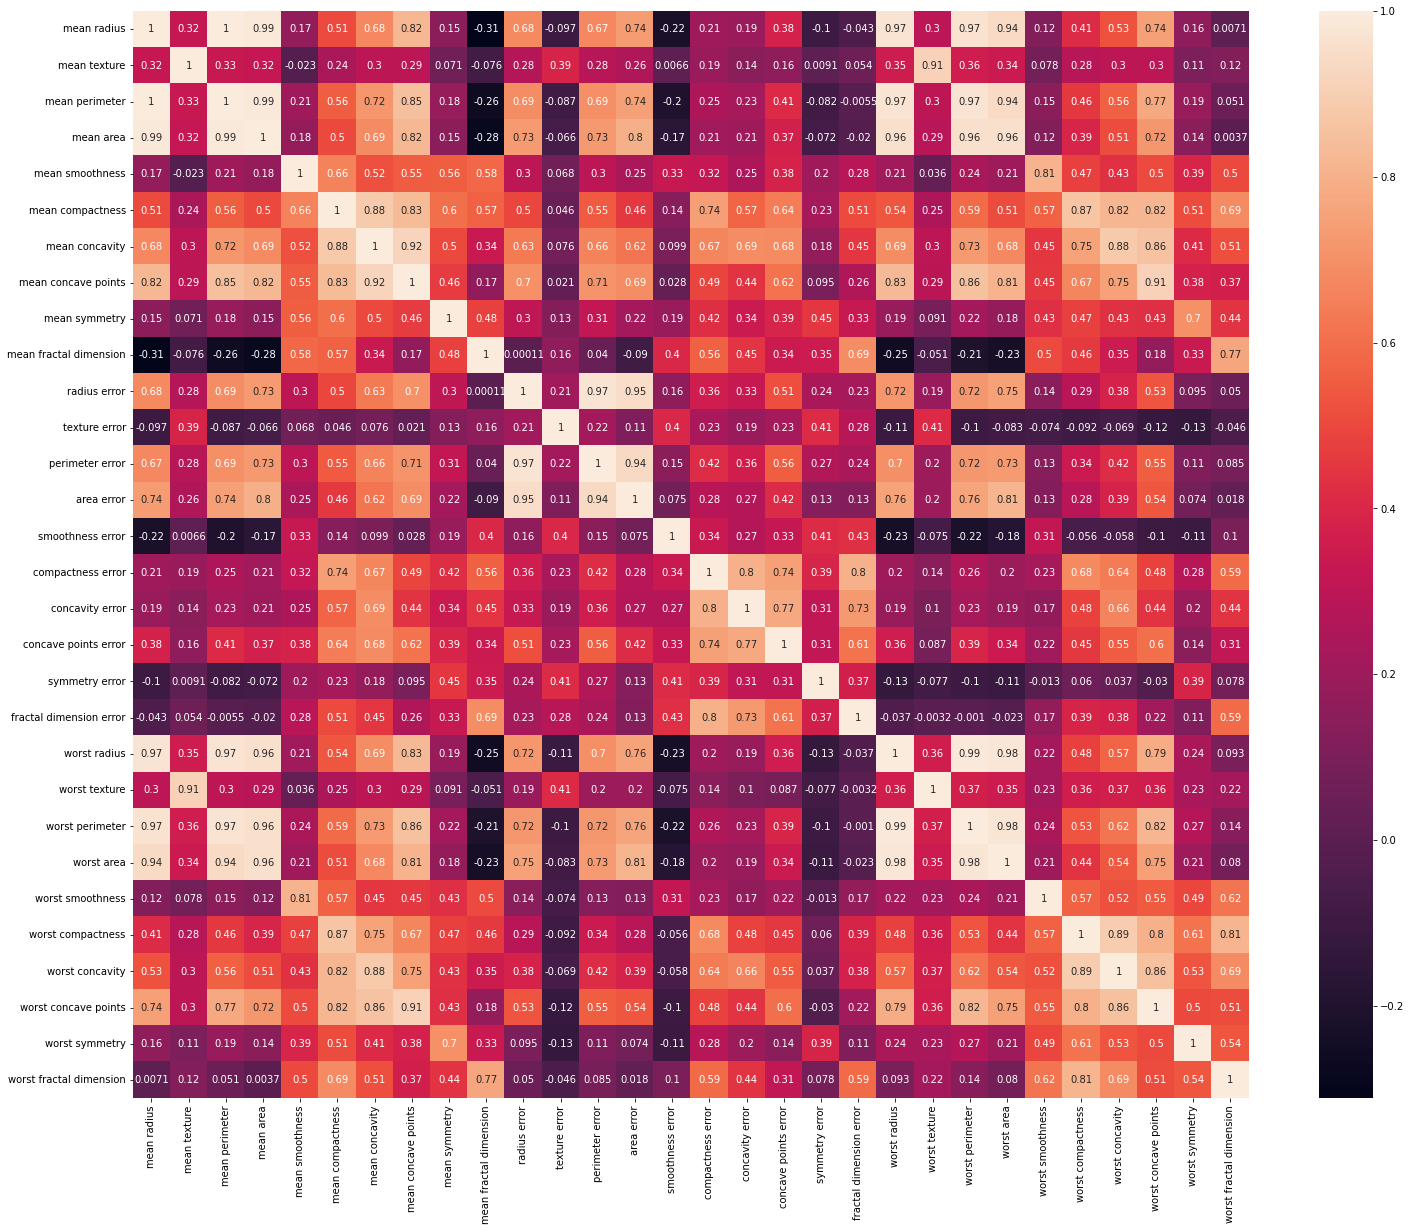

In [7]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, ax=ax)

As you can see, some variables are highly correlated with others, that is, we have multicollinearity.

### Building the model

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
X = df
y = pd.Series(cancer.target)

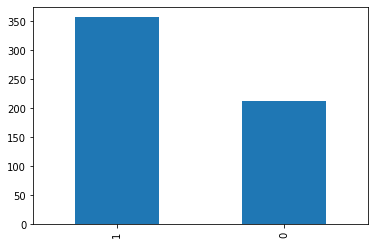

In [10]:
y.value_counts().plot(kind='bar')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)

In [12]:
clf = LogisticRegression(max_iter=2500)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2500)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
# Evaluation of the result

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
print("Train accuracy: ", np.round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy: ", np.round(accuracy_score(y_test, clf.predict(X_test)), 2))

Train accuracy:  0.96
Test accuracy:  0.96


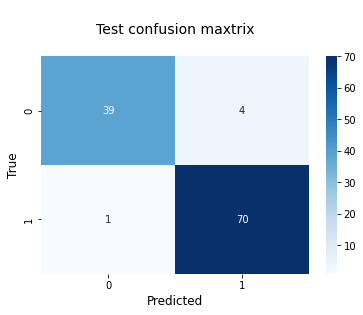

In [16]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("\nTest confusion maxtrix\n", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12);

The base model is very good. We don't overfit. It worked fine with the test data. Let's see if we can improve the model's performance by applying PCA.

### Applying the PCA

PCA is a technique for linear dimensionality reduction that transforms a set of correlated variables (p) into a smaller number k (k p) of uncorrelated variables called **principal components** keeping as much of the original base variation as possible. In the context of Machine Learning, it is considered an unsupervised algorithm used for dimensionality reduction. If one

If the variables are not on the same scale, we need to do this transformation before applying PCA to our data, as PCA directions are highly sensitive to the scale of the data.

The most important part of PCA is selecting the best number of components for a given dataset. Let's start with this step and so we won't define the number of components.

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# Normalizing the base so that the variables are on the same scale

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [19]:
# Applying the PCA

pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

In [20]:
print("Autovalores:")
print(pca.explained_variance_)
print()

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Autovalores:
[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]

Variances (Percentage):
[4.42720256e+01 1.89711820e+01 9.39316326e+00 6.60213492e+00
 5.49576849e+00 4.02452204e+00 2.25073371e+00 1.58872380e+00
 1.38964937e+00 1.16897819e+00 9.79718988e-01 8.70537901e-01
 8.04524987e-01 5.23365745e-01 3.13783217e-01 2.66209337e-01
 1.97996793e-01 1.75395945e-01 1.64925306e-01 1.03864675e-01
 9.99096464e-02 9.14646751e-02 8.11361259e-02 6.01833567e-02
 5.16042379e-02 2.72587995e-02 2.30015463e-02 5.29779290e-03
 2.49601032e-03 4.43482743e-04]



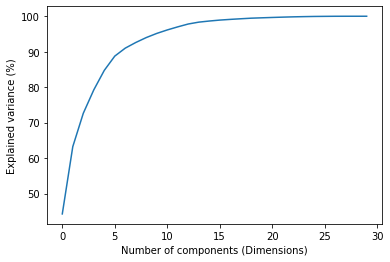

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)");

The first component alone captures about 44% of the variability in the data, and the second component captures about 19% of the variability in the data, and so on. The first 6 components together capture about 88.76% of the variability in the data. Let's keep the first 6 components.

In [22]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

In [23]:
# PCA with 6 components

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)

In [24]:
X_pca.head()

,0,1,2,3,4,5
0,9.192837,1.948583,-1.123166,3.633731,-1.195111,1.411427
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028655
2,5.733896,-1.075174,-0.551748,0.912083,-0.177085,0.541453
3,7.122953,10.275589,-3.232789,0.152547,-2.960876,3.053423
4,3.935302,-1.948072,1.389767,2.940639,0.546748,-1.226495


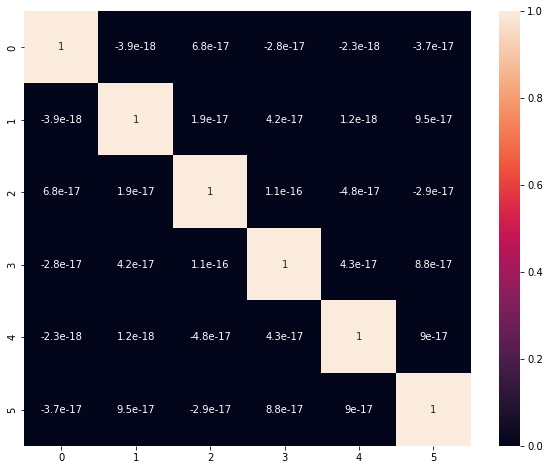

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(X_pca.corr(), annot=True, ax=ax)

Looking at the components heatmap we don't see any correlation between them. This is because the PCA transformed the set of correlated variables into a set of uncorrelated variables.

### PCA + Logistic Regression

In [26]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, shuffle=True, random_state=42)

In [27]:
clf = LogisticRegression(max_iter=2500)
clf.fit(X_train_pca, y_train)

LogisticRegression(max_iter=2500)

In [28]:
y_pred = clf.predict(X_test_pca)

In [29]:
print("Train accuracy: ", np.round(accuracy_score(y_train, clf.predict(X_train_pca)), 2))
print("Test accuracy: ", np.round(accuracy_score(y_test, clf.predict(X_test_pca)), 2))

Train accuracy:  0.98
Test accuracy:  0.98


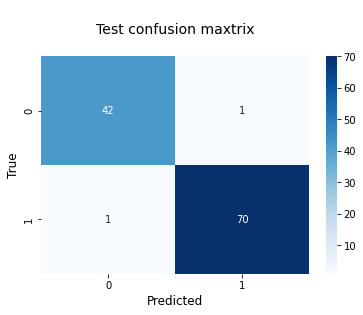

In [30]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("\nTest confusion maxtrix\n", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12);

You can compare the two performances, before and after the PCA. The accuracy of the test increased by 2% and the number of false negatives was also reduced. 

## Building a Pipeline for our project

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
sc = StandardScaler()
pca = PCA(n_components=6)
log_reg = LogisticRegression(max_iter=2500)

log_reg_model = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('regressor', log_reg)
])

In [33]:
log_reg_model.fit(X,y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('regressor', LogisticRegression(max_iter=2500))])

---